# BMEN 509 Project ABC-DISC

Details/Information


https://www.geeksforgeeks.org/python-blood-cell-identification-using-image-processing/

In [1]:
# Library Imports
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage import io
from skimage import color
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [2]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'sample.png'
]

#Note this is image-4.png from the Kaggle data set available here: https://www.kaggle.com/draaslan/blood-cell-detection-dataset

In [3]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!



# Image Enhancement

In [4]:
#Read original image
filename = os.path.join(data_directory, 'sample.png') #Read file and open image
#filename = os.path.join(data_directory, 'c1.png')
image = cv2.imread(filename)

In [5]:
#Convert to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.imwrite('gray.png', gray) 

True

In [6]:
#Apply median filter for smoothing
blurM = cv2.medianBlur(gray, 5) 
cv2.imwrite('blurM.png', blurM) 

True

In [7]:
#Apply Gaussian filter for smoothing
blurG = cv2.GaussianBlur(gray, (9, 9), 0) 
cv2.imwrite('blurG.png', blurG) 

True

In [8]:
#Histogram equalization
histoNorm = cv2.equalizeHist(gray) 
cv2.imwrite('histoNorm.png', histoNorm) 

True

In [9]:
#Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8)) 
claheNorm = clahe.apply(gray) 
cv2.imwrite('claheNorm.png', claheNorm) 

True

In [10]:
#Constrast stretching
#A function to map each intensity level to an output intensity level
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1) * pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2 
  
    # Define parameters
  
  
# r1 = 70
# s1 = 0
# r2 = 200
# s2 = 255

# r1 = 75
# s1 = 0
# r2 = 190
# s2 = 255



In [11]:
#Vectorize the function to apply it to each value in the Numpy array
pixelVal_vec = np.vectorize(pixelVal) 

In [12]:
#Apply contrast stretching 
# contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2) 
# contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2) 

# cv2.imwrite('contrast_stretch.png', contrast_stretched) 
# cv2.imwrite('contrast_stretch_blurM.png',  
#             contrast_stretched_blurM) 

In [13]:
#Edge detection using canny edge detector 
# edge = cv2.Canny(gray, 100, 200) 
# cv2.imwrite('edge.png', edge) 
  
# edgeG = cv2.Canny(blurG, 100, 200) 
# cv2.imwrite('edgeG.png', edgeG) 
  
# edgeM = cv2.Canny(blurM, 100, 200) 
# cv2.imwrite('edgeM.png', edgeM) 

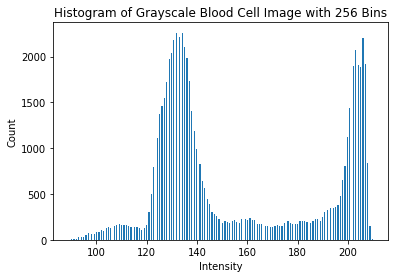

True

In [14]:
#Before, we saw the effect of applying each transformation to the original grayscale image
#Now let's try doing all the operations in sequence to obtain an enhanced image

#Convert to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#cv2.imwrite('gray.png', gray) 


#Plot the histogram of the image with 256 bins
plt.hist(gray.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.title('Histogram of Grayscale Blood Cell Image with 256 Bins')
plt.show()

#Apply median filter for smoothing
blurM = cv2.medianBlur(gray, 5) 
#cv2.imwrite('blurM.png', blurM) 

#Apply Gaussian filter for smoothing
blurG = cv2.GaussianBlur(blurM, (9, 9), 0) 
#cv2.imwrite('blurG.png', blurG) 

#Histogram equalization
histoNorm = cv2.equalizeHist(blurG) 
#cv2.imwrite('histoNorm.png', histoNorm) 

#Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8)) 
claheNorm = clahe.apply(histoNorm) 
#cv2.imwrite('claheNorm.png', claheNorm) 

#Constrast stretching function has already been defined and vectorized

#Apply contrast stretching
# contrast_stretched = pixelVal_vec(claheNorm, r1, s1, r2, s2)
# cv2.imwrite('cell.png', contrast_stretched) 
contrast_stretched = pixelVal_vec(claheNorm, 120, 0, 250, 255)
cv2.imwrite('cell.png', contrast_stretched) 
contrast_stretched1 = pixelVal_vec(claheNorm, 120, 0, 140, 255)
cv2.imwrite('cell1.png', contrast_stretched1) 
contrast_stretched2 = pixelVal_vec(claheNorm, 200, 0, 250, 255)
cv2.imwrite('cell2.png', contrast_stretched2) 







# Image Segmentation and Feature Extraction

In [15]:
#Read enhanced image as grayscale, hence the flag set equal to 0
img = cv2.imread('cell.png', 0)

In [16]:
#Morphological operations
kernel = np.ones((5, 5), np.uint8) 
dilation = cv2.dilate(img, kernel, iterations = 1) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 

In [17]:
#Adaptive thresholding on mean and Gaussian filters
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY, 11, 2) 
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            cv2.THRESH_BINARY, 11, 2) 

In [18]:
#Otsu's thresholding
ret4, th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [19]:
# Initialize the list 
Cell_count, x_count, y_count = [], [], [] 

In [20]:
#Read original image to display the circle and centre detection   
display = cv2.imread(filename) 

In [21]:
#Hough transform with modified circular parameters 
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 20,  
                           param1 = 50, param2 = 28, minRadius = 1, maxRadius = 20) 

In [22]:
#Hough transform with modified circular parameters 
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 20,  
#                            param1 = 0, param2 = 28, minRadius = 1, maxRadius = 10) 

In [23]:
print(len(circles))

1


In [24]:
#Circle detection and labelling using Hough transformation
if circles is not None: 
        # convert the (x, y) coordinates and radius of the circles to integers 
        #circles = np.round(circles[0, :]).astype("int") 
        
        circles = np.uint16(np.around(circles))
        
  
        # loop over the (x, y) coordinates and radius of the circles 
        #for (x, y, r) in circles[0,:]: 
        for i in circles[0,:]:
                x = i[0];
                y = i[1];
                r = i[2];
                cv2.circle(display, (x, y), r, (0, 255, 0), 2) 
                cv2.rectangle(display, (x - 2, y - 2),  
                              (x + 2, y + 2), (0, 128, 255), -1) 
                Cell_count.append(r) 
                x_count.append(x) 
                y_count.append(y) 
        # show the output image 
#         cv2.imshow("gray", display) 
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#Imshow doesn't work for some reason so just save image to file instead
cv2.imwrite('result.png', display) 

True

In [25]:
#Display the count of white blood cells  
print(len(Cell_count)) 

4


In [26]:
# Total number of radii
print(Cell_count) 

[19, 18, 18, 16]


In [27]:
# X co-ordinate of circle 
print(x_count)

[79, 105, 229, 163]


In [28]:
# Y co-ordinate of circle 
print(y_count)  

[169, 193, 115, 57]


In [29]:
# #Circle detection and labelling using Hough transformation
# if circles is not None: 
#         # convert the (x, y) coordinates and radius of the circles to integers 
#         circles = np.round(circles[0, :]).astype("int") 
  
#         # loop over the (x, y) coordinates and radius of the circles 
#         for (x, y, r) in circles: 
  
#                 cv2.circle(display, (x, y), r, (0, 255, 0), 2) 
#                 cv2.rectangle(display, (x - 2, y - 2),  
#                               (x + 2, y + 2), (0, 128, 255), -1) 
#                 Cell_count.append(r) 
#                 x_count.append(x) 
#                 y_count.append(y) 
#         # show the output image 
#         cv2.imshow("gray", display) 
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()


In [30]:
#Parameters likely need to be changed for this dataset
#Read papers and CV2 documentation to better understand what's going on
#Check out OpenCV tutorials
#Google search: blood cell intensity threshold


# filename = os.path.join(data_directory, 'sample.png') #Read file and open image
# img_rgb = io.imread(filename) #Colour image
# img_gray = color.rgb2gray(img_rgb) #Grayscale image

# plt.figure(figsize = (16,8))
# plt.suptitle('Sample Blood Cell Image Taken Under a Microscope')

# plt.subplot(121)
# plt.imshow(img_rgb)
# plt.title('Colour')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.subplot(122)
# plt.imshow(img_gray, cmap='gray', vmin=0, vmax=1)
# plt.title('Grayscale')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.show()

In [31]:
#Need to double-check whether we actually need to convert to grayscale.
#Note there are many different conversion algorithms that apply different weightings.

#Useful links:
#https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-preserving)_conversion_to_grayscale
#https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python